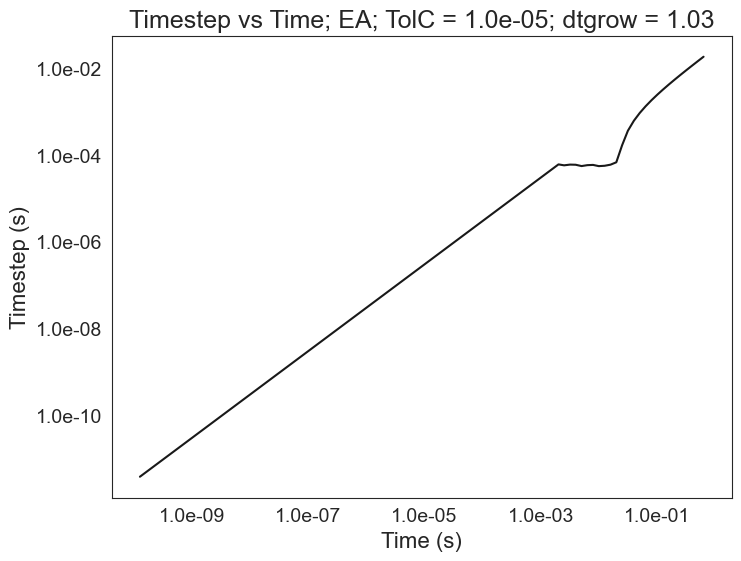

In [1]:
#dt vs t plot 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the directory where the plotfiles are located
file_dir = "./Output"

# Initialize empty lists to store the t and dt values
t_values = []
dt_values = []

# Loop over each plotfile
for i in range(99):
    # Construct the filename
    filename = os.path.join(file_dir, f"PlotFile_{i}")

    # Open the file and extract the dt and t values
    with open(filename, "r") as f:
        for line in f:
            if line.startswith("t:"):
                t = float(line.split(": ")[1])
            elif line.startswith("dt:"):
                dt = float(line.split(": ")[1])

    # Append the t and dt values to the lists
    t_values.append(t)
    dt_values.append(dt)

# Convert the lists to NumPy arrays
t_array = np.array(t_values)
dt_array = np.array(dt_values)

# Set up the plot
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

# Create a line plot of dt vs t on a logarithmic scale, starting from the second data point
ax.plot(t_array[1:], dt_array[1:], c="black", alpha=0.9, linewidth=1.5, zorder=2)

# Add legend
#ax.plot([], [], label="20.5399 [MeV]", c="black", alpha=0.9, linewidth=2.5, zorder=2)
#ax.legend(loc="upper left", fontsize=14)

# Set the axis scales to logarithmic
ax.set_xscale('log')
ax.set_yscale('log')

# Add title and labels
ax.set_title("Timestep vs Time; EA; TolC = 1.0e-05; dtgrow = 1.03", fontsize=18)
ax.set_xlabel("Time (s)", fontsize=16)
ax.set_ylabel("Timestep (s)", fontsize=16)

# Set the tick label font size and SI units
ax.tick_params(axis='both', which='major', labelsize=14)
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1e'))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1e'))

# Add annotation
#ax.text(1.5e-5, 8e-8, "Collision Matrix", fontsize=12, ha="left", va="bottom")

# Save the plot to a file
plt.savefig("dt_vs_t_5.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

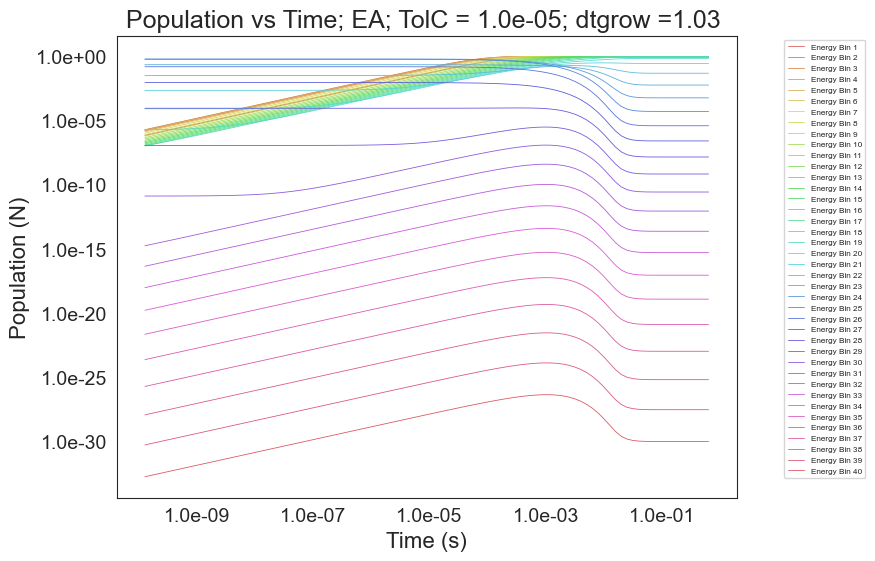

In [24]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the directory where the plotfiles are located
file_dir = "./Output"

# Initialize empty lists to store the N values and t values for all indices
N_values = []
t_values = []

# Loop over each plotfile
for i in range(99):
    # Construct the filename
    filename = os.path.join(file_dir, f"PlotFile_{i}")

    # Open the file and extract the N values and the t value for all indices
    with open(filename, "r") as f:
        N = []
        for line in f:
            if line.startswith("t:"):
                t = float(line.split(": ")[1])
            elif line.startswith("N:"):
                N_line = line.split(": ")[1].strip()
                N.append(np.array([float(x) for x in N_line.split()]))
                
        # Append the N values and the t value to the lists
        N_values.append(N)
        t_values.append(t)

# Convert the lists to NumPy arrays
N_array = np.array(N_values)
t_array = np.array(t_values)

# Set up the plot
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

# Create line plots of N vs t on a logarithmic scale, starting from the second data point
palette = sns.color_palette("hls", n_colors=N_array.shape[2])
colors = list(palette.as_hex())
for i in range(N_array.shape[2]):
    ax.plot(t_array[1:], N_array[1:, :, i], c=colors[i], alpha=0.98, linewidth=0.60, zorder=2)



# Add legend
labels = [f"Energy Bin {i+1}" for i in range(N_array.shape[2])]
ax.legend(labels=labels, loc="upper left", fontsize=5.93, bbox_to_anchor=(1.07, 1))

# Add second legend
#text = "20.5399 [MeV]"
#bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="gray", lw=0.5)
#ax.text(0.7, 0.1, text, transform=ax.transAxes, fontsize=12,
 #       verticalalignment="bottom", bbox=bbox_props)


# Set the axis scales to logarithmic
ax.set_xscale('log')
ax.set_yscale('log')

# Add title and labels
ax.set_title("Population vs Time; EA; TolC = 1.0e-05; dtgrow =1.03 ", fontsize=18)
ax.set_xlabel("Time (s)", fontsize=16)
ax.set_ylabel("Population (N)", fontsize=16)

# Set the tick label font size and SI units
ax.tick_params(axis='both', which='major', labelsize=14)
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1e'))
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.1e'))

# Save the plot to a file
plt.savefig("P_vs_t_5.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()
